#Machine Learning algorithms used for prostate cancer prediction

###Data loading and cleaning step:

Importing the libraries:

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import metrics

Import the data from our dataset

In [53]:
cancer_data = pd.read_csv('Prostate_Cancer.csv')

Getting basic information about our dataset

In [54]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


Checking the shape of our dataset

In [55]:
print('Dataset: ',cancer_data.shape)

Dataset:  (100, 10)


Preview of our data:

In [56]:
cancer_data.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
diagnosis_result,M,B,M,M,M,B,M,M,M,M,...,B,M,B,B,M,M,B,B,B,M
radius,23,9,21,14,9,25,16,15,19,25,...,23,10,14,10,22,23,22,19,21,16
texture,12,13,27,16,19,25,26,18,24,11,...,27,12,14,17,26,16,14,27,24,27
perimeter,151,133,130,78,135,83,120,90,88,84,...,95,100,85,87,100,132,78,62,74,94
area,954,1326,1203,386,1297,477,1040,578,520,476,...,663,728,552,555,706,1264,451,295,413,643
smoothness,0.143,0.143,0.125,0.07,0.141,0.128,0.095,0.119,0.127,0.119,...,0.09,0.092,0.074,0.102,0.104,0.091,0.105,0.102,0.09,0.098
compactness,0.278,0.079,0.16,0.284,0.133,0.17,0.109,0.165,0.193,0.24,...,0.086,0.104,0.051,0.082,0.155,0.131,0.071,0.053,0.075,0.114
symmetry,0.242,0.181,0.207,0.26,0.181,0.209,0.179,0.22,0.235,0.203,...,0.169,0.172,0.139,0.164,0.186,0.21,0.19,0.135,0.162,0.188
fractal_dimension,0.079,0.057,0.06,0.097,0.059,0.076,0.057,0.075,0.074,0.082,...,0.059,0.061,0.053,0.057,0.063,0.056,0.066,0.069,0.066,0.064


First 10 observations of the data:

In [57]:
cancer_data.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


Last 5 observations of our data:

In [58]:
cancer_data.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


Basic statistical data of the dataset - description

In [59]:
cancer_data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


Removing the "id" column since it is unnecessary in our investigation

In [60]:
cancer_data.columns
cancer_data.drop(['id'],axis=1,inplace=True)
cancer_data.head()


,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


Transforming the *diagnosis_result* into a numeric type since we need to encode the data to be understanable for the machine.

Alterantive method 'Label encoding' is given - however it does the same thing

In [61]:
cancer_data.diagnosis_result = [1 if each == 'M' else 0 for each in cancer_data.diagnosis_result]

# Alternative method - ENCODING
# from sklearn.preprocessing import LabelEncoder
# enc=LabelEncoder()
# cancer_data['diagnosis_result']=enc.fit_transform(cancer_data['diagnosis_result'])
# cancer_data.info()


Checking the info about our dataset again so we can observe that now *diagnosis_result* is changed to int64 type instead of an object type

In [62]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    int64  
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 7.2 KB


In this code snippet we count the total values of cancerous and non-cancerous cases in our dataset:

In [63]:
cancer_data.diagnosis_result.value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

Barplot of the data above:

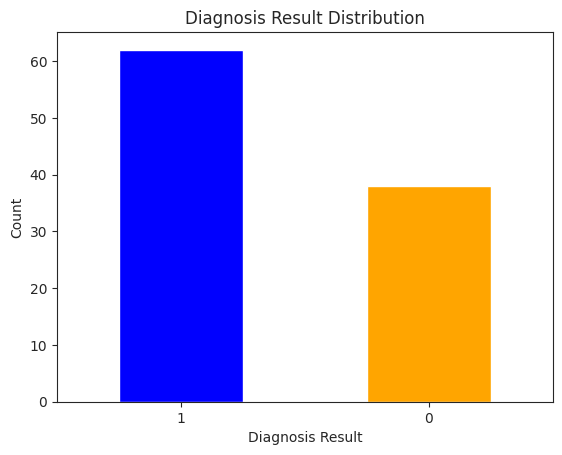

In [64]:
value_counts = cancer_data.diagnosis_result.value_counts()[0:30]

colors = ['blue', 'orange']

value_counts.plot(kind='bar', color=colors)
plt.title('Diagnosis Result Distribution')
plt.xlabel('Diagnosis Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [65]:
# We should assign x and y values for test-train datas split.
# y = cancer_data.diagnosis_result.values
# x_data = cancer_data.drop(['diagnosis_result'],axis=1)

In [66]:
# Normalization: Normalization means all of the values of data, scale between 0 and 1.
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# x = scaler.fit_transform(x_data)

### Data exploration step:

Producing a correlation heatmap of some subsets of the data:

<Axes: >

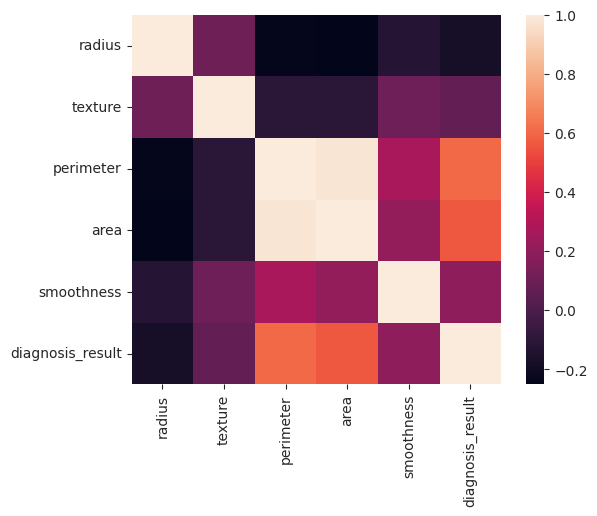

In [67]:
df = cancer_data[['radius','texture','perimeter','area', 'smoothness','diagnosis_result']] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

Producing a pair plot in order to see more detailed preview of our data.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


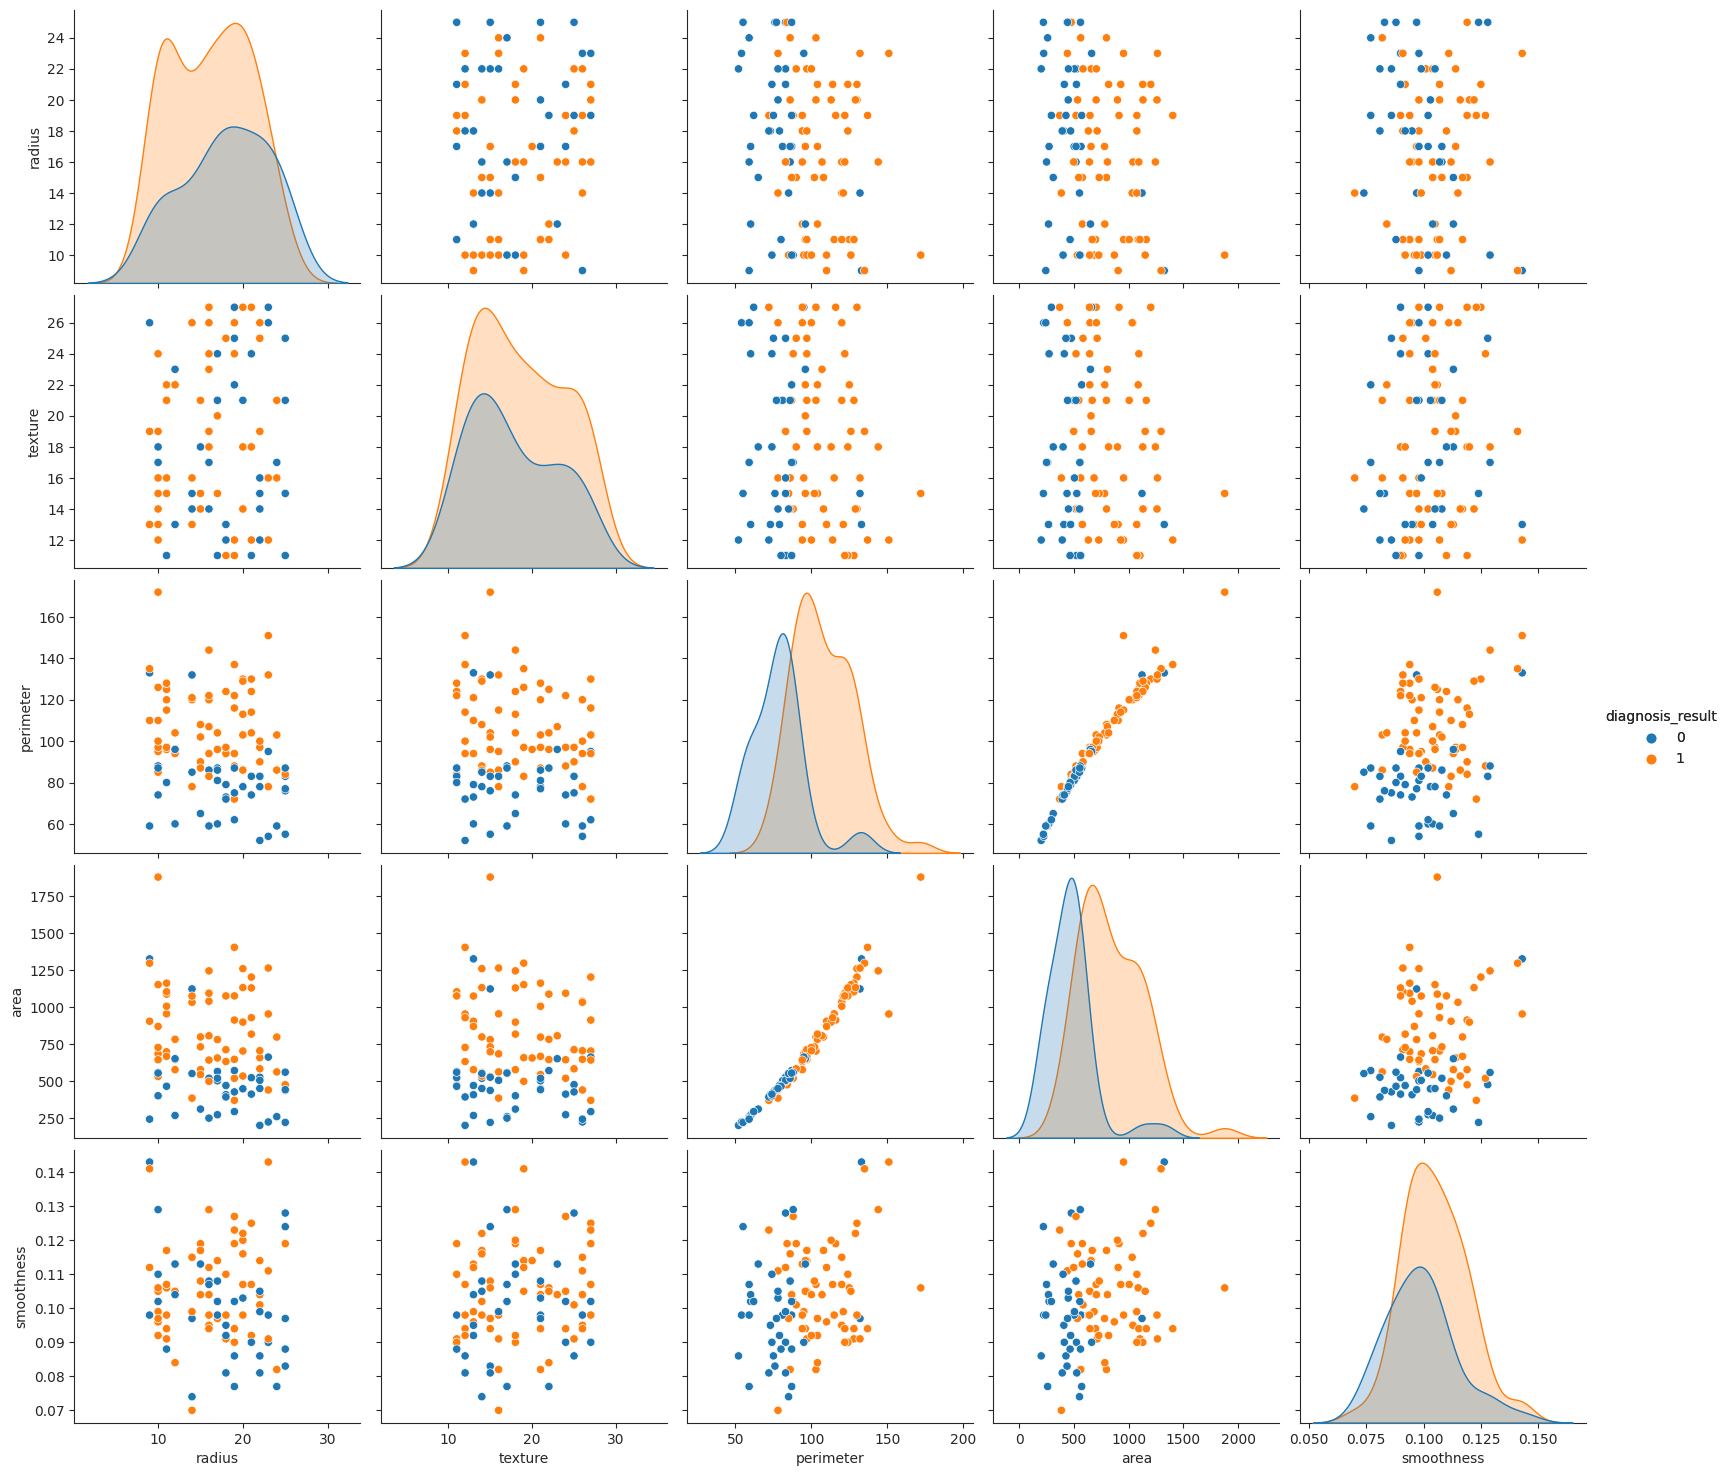

In [68]:
sns.set_style("ticks")
pairplot = sns.pairplot(df, hue="diagnosis_result", size=3)
pairplot.add_legend()
plt.show()


Producing two boxplots as well. We do this in order to observe possible outliers in our data

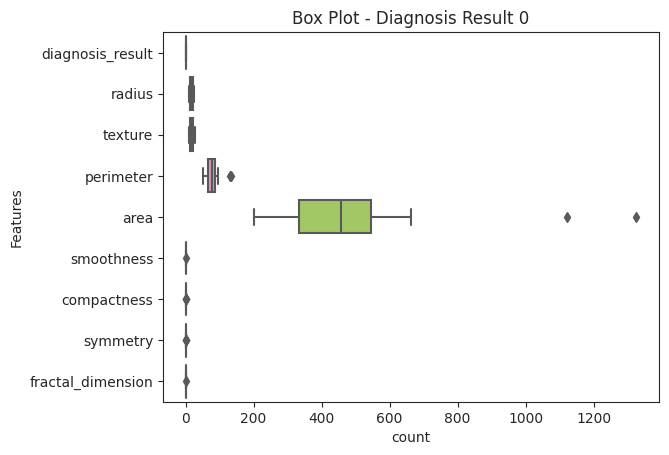

In [69]:
## boxplot1 = sns.boxplot( palette="Set2", orient="h",data=cancer_data[cancer_data.diagnosis_result==0])

boxplot1 = sns.boxplot(palette="Set2", orient="h", data=cancer_data[cancer_data.diagnosis_result == 0])
plt.title('Box Plot - Diagnosis Result 0')
plt.xlabel('count')
plt.ylabel('Features')
plt.show()


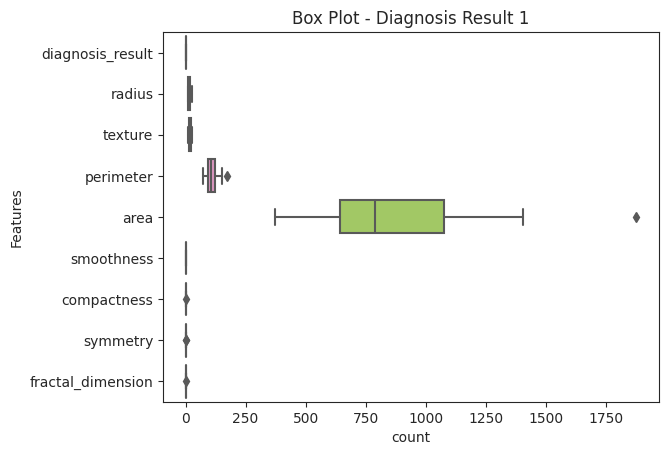

In [70]:
##boxplot2 = sns.boxplot( palette="Set2", orient="h",data=cancer_data[cancer_data.diagnosis_result==1])
boxplot2 = sns.boxplot(palette="Set2", orient="h", data=cancer_data[cancer_data.diagnosis_result == 1])
plt.title('Box Plot - Diagnosis Result 1')
plt.xlabel('count')
plt.ylabel('Features')
plt.show()

##Feature engineering step

Division of the data into training and testing set:

In [71]:
x_train, x_test, y_train, y_test=train_test_split(
    cancer_data.drop(['diagnosis_result'], axis=1),
    cancer_data[['diagnosis_result']],
    test_size=0.2,
    random_state=41)

Since we divided the data to be 80% training set and 20% testing set, we are getting the following info:

In [72]:
print('X train shape: ', x_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', x_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (80, 8)
Y train shape:  (80, 1)
X test shape:  (20, 8)
Y test shape:  (20, 1)


In the next code snippet our aim is to remove the outliers in our data:

In [73]:
columns=cancer_data.columns
columns_new=[]
for i in columns:
    columns_new.append(any(cancer_data[i].isnull()|cancer_data[i].isnull()))
cancer_data=cancer_data.drop(columns[columns_new],axis=1)

In [74]:
for column in x_train.columns:

    df_train1 = x_train[(y_train.diagnosis_result==0) & (x_train[column]<np.mean(x_train.loc[y_train.diagnosis_result==0,column])+3*np.std(x_train.loc[y_train.diagnosis_result==0,column]))]
    df_test1 = x_test[(y_test.diagnosis_result==0) & (x_test[column]<np.mean(x_train.loc[y_train.diagnosis_result==0,column])+3*np.std(x_train.loc[y_train.diagnosis_result==0,column]))]

    label_train1 = y_train[(y_train.diagnosis_result==0) & (x_train[column]<np.mean(x_train.loc[y_train.diagnosis_result==0,column])+3*np.std(x_train.loc[y_train.diagnosis_result==0,column]))]
    label_test1 = y_test[(y_test.diagnosis_result==0) & (x_test[column]<np.mean(x_train.loc[y_train.diagnosis_result==0,column])+3*np.std(x_train.loc[y_train.diagnosis_result==0,column]))]

    df_train2 = x_train[(y_train.diagnosis_result==1) & (x_train[column]<np.mean(x_train.loc[y_train.diagnosis_result==1,column])+3*np.std(x_train.loc[y_train.diagnosis_result==1,column]))]
    df_test2 = x_test[(y_test.diagnosis_result==1) & (x_test[column]<np.mean(x_train.loc[y_train.diagnosis_result==1,column])+3*np.std(x_train.loc[y_train.diagnosis_result==1,column]))]

    label_train2 = y_train[(y_train.diagnosis_result==1) & (x_train[column]<np.mean(x_train.loc[y_train.diagnosis_result==1,column])+3*np.std(x_train.loc[y_train.diagnosis_result==1,column]))]
    label_test2 = y_test[(y_test.diagnosis_result==1) & (x_test[column]<np.mean(x_train.loc[y_train.diagnosis_result==1,column])+3*np.std(x_train.loc[y_train.diagnosis_result==1,column]))]

In [75]:
x_train=pd.concat([df_train1, df_train2])
y_train=pd.concat([label_train1, label_train2])

x_test=pd.concat([df_test1, df_test2])
y_test=pd.concat([label_test1, label_test2])

x_train.shape


(78, 8)

Producing another heatmap of correlation, so we can focus on some parameters that have a very high correlation.

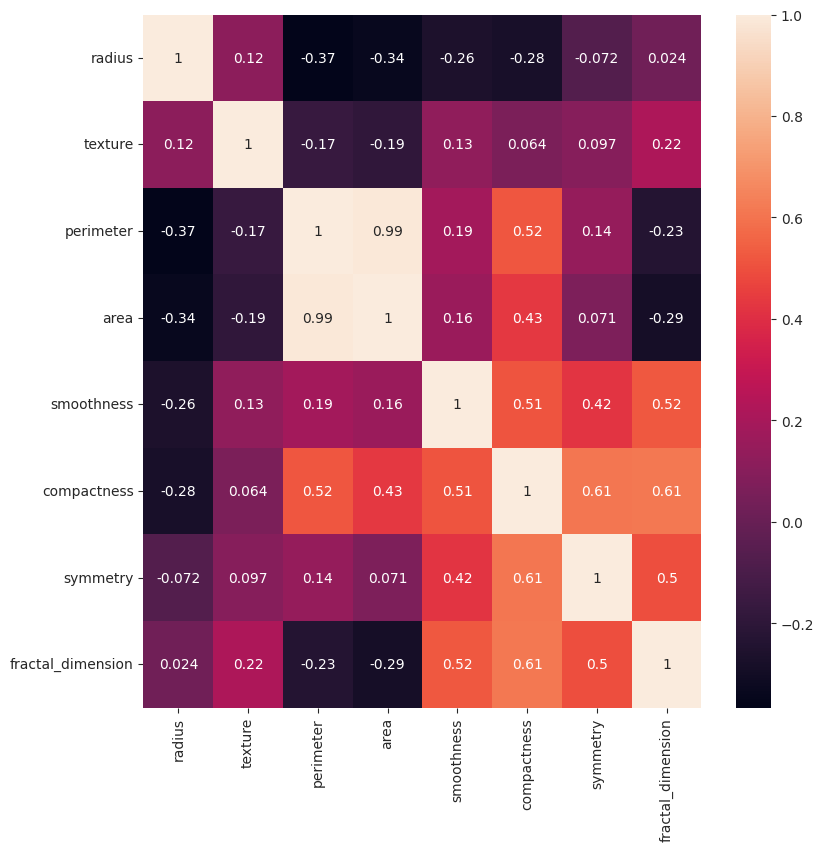

In [76]:
from numpy.ma import size
corrMatrix = x_train.corr()
fig, corrPlot = plt.subplots(figsize=(9, 9))
sns.heatmap(corrMatrix, annot=True,ax=corrPlot)
plt.show()

Printing out the paramter that has high correlation that is not helpful in our data:

In [77]:
correlated_features = set()
for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > 0.7:
            colname = corrMatrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'area'}


Dropping that parameter *area*

In [78]:
x_train.drop(labels=correlated_features, axis=1, inplace=True)
x_test.drop(labels=correlated_features, axis=1, inplace=True)

Correlation heatmap with area variable removed:

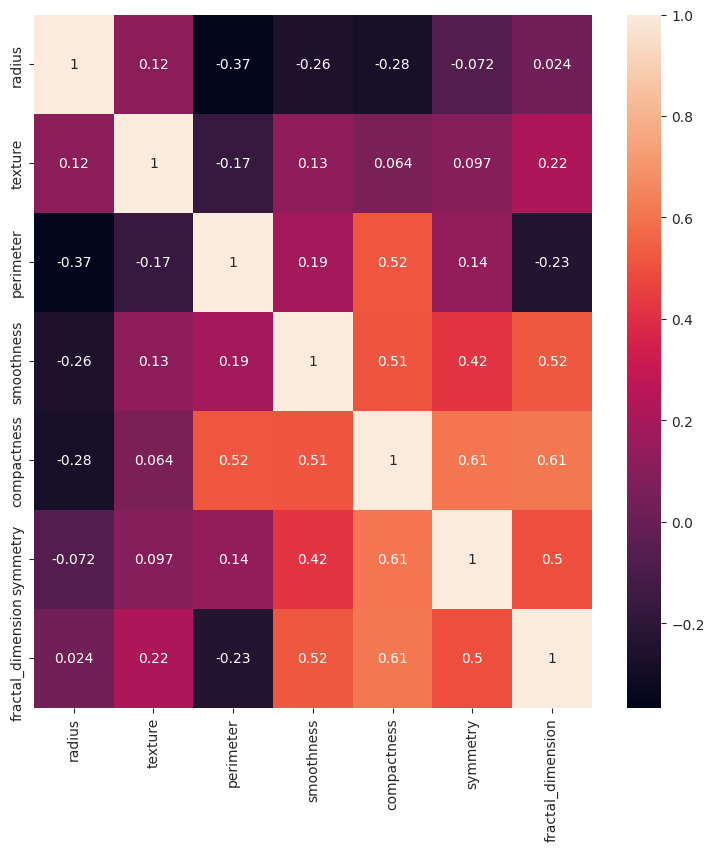

In [79]:
corrMatrix = x_train.corr()
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()

Checking the new shape of our data:

In [80]:
constant_filter = VarianceThreshold(threshold=0.0)
constant_filter.fit(x_train)
x_train = constant_filter.transform(x_train)
x_test = constant_filter.transform(x_test)

x_train.shape, x_test.shape

((78, 7), (20, 7))

Using 'Standard Scaler' to scale our data:

In [81]:
mm_scaler = preprocessing.StandardScaler()
x_train = pd.DataFrame(mm_scaler.fit_transform(x_train))
x_test = pd.DataFrame(mm_scaler.transform(x_test))

Creating a function named 'confusiuon matrix' that we will use in all of our ML models from now on, with graphical representation of the TP FP TN FN

In [82]:
def conf_matrix(matrix,pred):
    class_names= [0,1]# name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

We will keep the scores and their respective names in a list data structure so at the end we can compare all of them:

In [83]:
method_names=[]
method_scores=[]

##Predictive modeling step:

Implementation of Logistic Regression algorithim to our data:

In [84]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=50, random_state=41)
logreg.fit(x_train, y_train.values.ravel())
y_pred=logreg.predict(x_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100
print("Test Accuracy of Logistic Regression Algorithm: {:.2f}%".format(acc))
method_names.append("Logistic Regression")
method_scores.append(logreg.score(x_test, y_test))

Test Accuracy of Logistic Regression Algorithm: 95.00%


Confusion matrix of LR algorithm

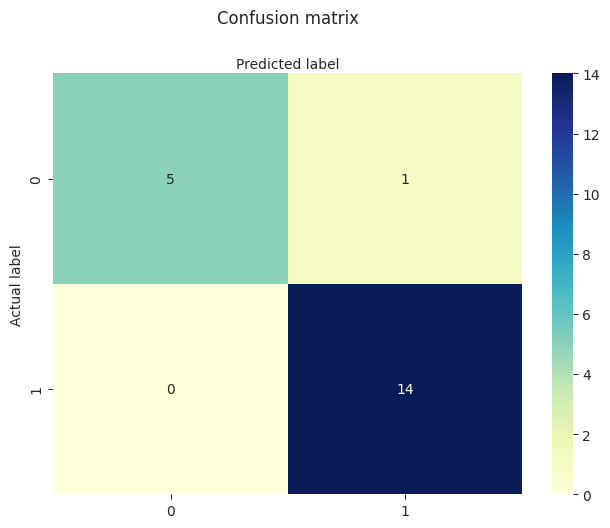

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [85]:

y_pred = logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)

report = classification_report(y_pred,y_test)
print(report)

Implementation of KNN algorithim to our data:

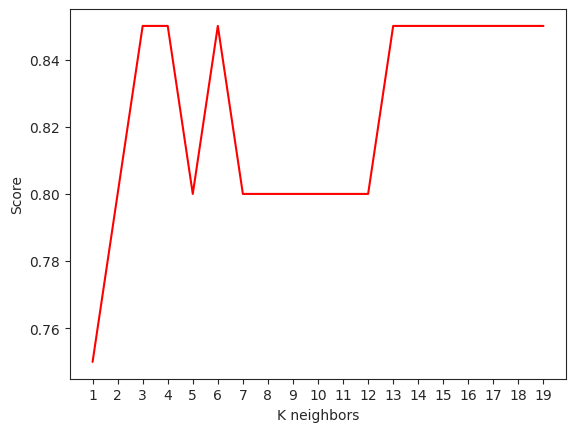

Maximum KNN Score is 85.00%


In [86]:
from sklearn.neighbors import KNeighborsClassifier

score = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    score.append(knn.score(x_test, y_test.values.ravel()))

plt.plot(range(1,20), score, color='red')
plt.xticks(np.arange(1,20,1))
plt.xlabel("K neighbors")
plt.ylabel("Score")
plt.show()

acc = max(score)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

Getting the number of neighbors that is most suitable, i.e., gives the best result

In [87]:
knn = KNeighborsClassifier(n_neighbors =4)  # n_neighbors refers to k
knn.fit(x_train, y_train.values.ravel())
method_names.append("KNN")
method_scores.append(knn.score(x_test, y_test))

Confusion matrix of KNN algorithm

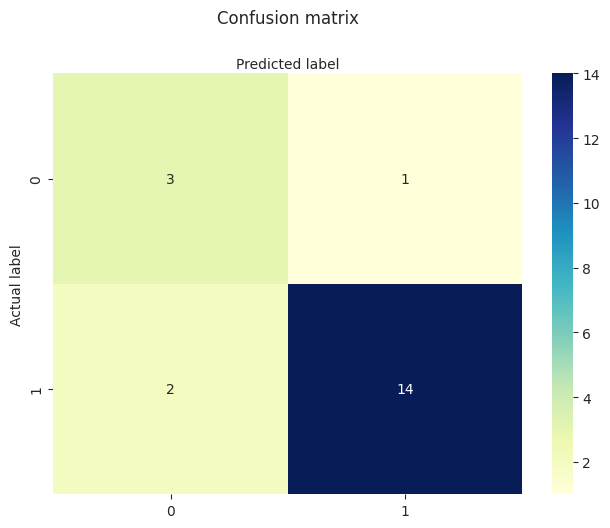

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.93      0.88      0.90        16

    accuracy                           0.85        20
   macro avg       0.77      0.81      0.78        20
weighted avg       0.87      0.85      0.86        20



In [88]:

y_pred = knn.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)

report = classification_report(y_pred,y_test)
print(report)

Implementation of SVM algorithim to our data:

In [89]:
from sklearn.svm import SVC
svm = SVC(random_state = 41, probability=True)
svm.fit(x_train, y_train.values.ravel())

y_pred=svm.predict(x_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))
method_names.append("SVM")
method_scores.append(svm.score(x_test, y_test))

Test Accuracy of SVM Algorithm: 80.00%


Confusion matrix of SVM algorithm

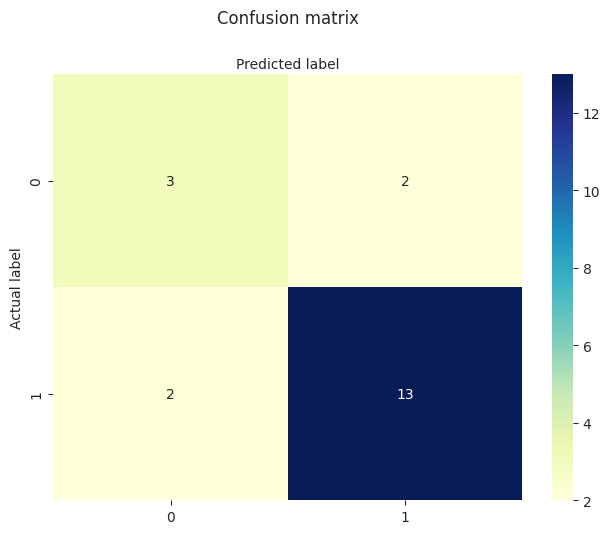

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.87      0.87      0.87        15

    accuracy                           0.80        20
   macro avg       0.73      0.73      0.73        20
weighted avg       0.80      0.80      0.80        20



In [90]:
y_pred = svm.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)

report = classification_report(y_pred,y_test)
print(report)

Implementation of NB algorithim to our data:

In [91]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train.values.ravel())

y_pred=nb.predict(x_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100

print("Accuracy of Naive Bayes: {:.2f}%".format(acc))
method_names.append("Naive Bayes")
method_scores.append(nb.score(x_test, y_test))

Accuracy of Naive Bayes: 85.00%


Confusion matrix of NB algorithm

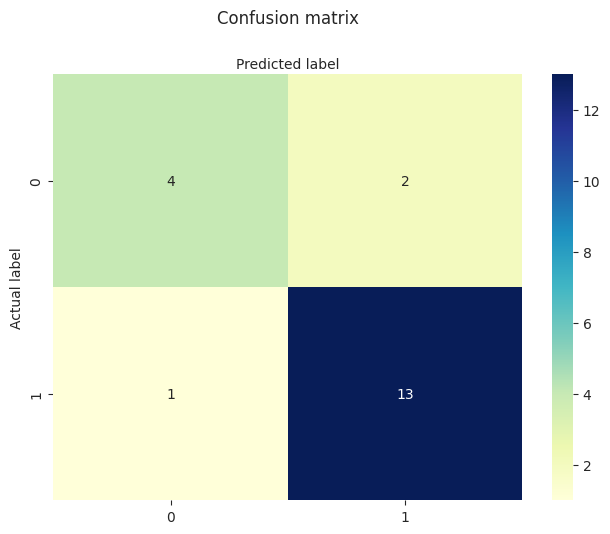

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



In [92]:
y_pred = nb.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)

report = classification_report(y_pred,y_test)
print(report)

Implementation of DT algorithim to our data:

In [93]:
from sklearn.tree import DecisionTreeClassifier

dtcla = DecisionTreeClassifier(random_state=41)

dtcla.fit(x_train, y_train.values.ravel())

y_pred = dtcla.predict(x_test)


acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100

print("Accuracy of DT : {:.2f}%".format(acc))
method_names.append("Decision Tree")
method_scores.append(dtcla.score(x_test, y_test))

Accuracy of DT : 85.00%


Confusion matrix of DT algorithm:

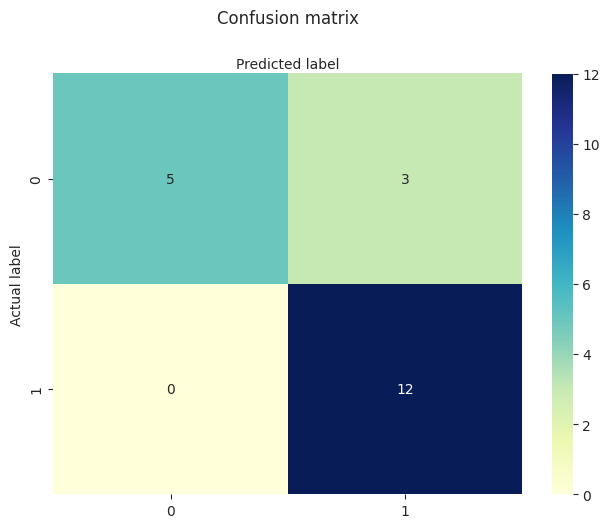

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.80      1.00      0.89        12

    accuracy                           0.85        20
   macro avg       0.90      0.81      0.83        20
weighted avg       0.88      0.85      0.84        20



In [94]:
y_pred = dtcla.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)

report = classification_report(y_pred,y_test)
print(report)

Implementation of RF algorithim to our data:

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced",n_estimators=200,random_state = 41)
rf.fit(x_train, y_train.values.ravel())
y_pred=rf.predict(x_test)
acc = metrics.accuracy_score(y_pred,y_test.values.ravel())*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
method_names.append("Random Forest")
method_scores.append(rf.score(x_test, y_test))

Random Forest Algorithm Accuracy Score : 95.00%


Confusion matrix of RF algorithm:

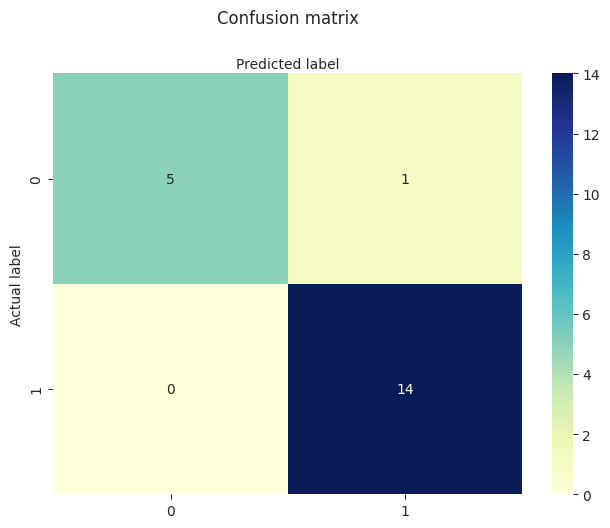

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [96]:
y_pred = rf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
report = classification_report(y_pred,y_test)
print(report)

Implementation of XGB algorithim to our data:

In [97]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=41)
xgb.fit(x_train, y_train,)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=41, ...)

Confusion matrix of XGB algorithm:



Training data confusion matrix
[[32  0]
 [ 0 46]]


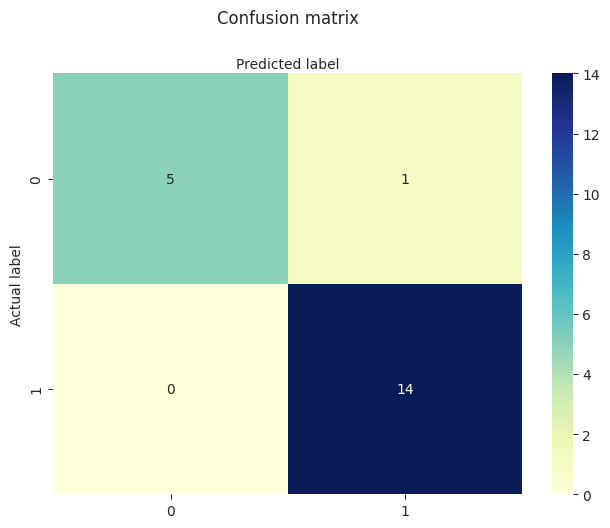

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20

Testing data confusion matrix
[[ 5  0]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20

training accuracy = 100.0
testing accuracy = 95.0


In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predictions= xgb.predict(x_train)
percentage=xgb.score(x_train,y_train)
res=confusion_matrix(y_train,predictions)
print("Training data confusion matrix")
print(res)
predictions= xgb.predict(x_test)
cnf_matrix = metrics.confusion_matrix(predictions, y_test)
conf_matrix(cnf_matrix,y_test)
report = classification_report(predictions,y_test)
print(report)
percentage=xgb.score(x_test,y_test)
res=confusion_matrix(y_test,predictions)
print("Testing data confusion matrix")
print(res)
print(classification_report(y_test, predictions))
# check the accuracy on the training set
print('training accuracy = '+str(xgb.score(x_train, y_train)*100))
print('testing accuracy = '+str(xgb.score(x_test, y_test)*100))
method_names.append("XGB")
method_scores.append(xgb.score(x_test, y_test))

Developing an ANN model for our data and implementing it

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(41)

ann_model = Sequential()

# Adding input layer and first hidden layer
ann_model.add(Dense(units=12, activation='relu', input_dim=x_train.shape[1]))
ann_model.add(Dropout(0.2))

# Add more hidden layers
ann_model.add(Dense(units=8, activation='relu'))

# Add output layer
ann_model.add(Dense(units=1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_model.summary()

history = ann_model.fit(x_train, y_train, epochs=200, batch_size=8)

test_loss, test_accuracy = ann_model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                96        
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 1s 2ms/step - loss: 0.6989 - accuracy: 0.4872
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.6864 - accurac

In [100]:
method_names.append("ANN")
method_scores.append(0.95)

Graphical representation of the loss and training accuracy of the ANN model, as well as the ROC analysis

1/1 [==============================] - 0s 34ms/step


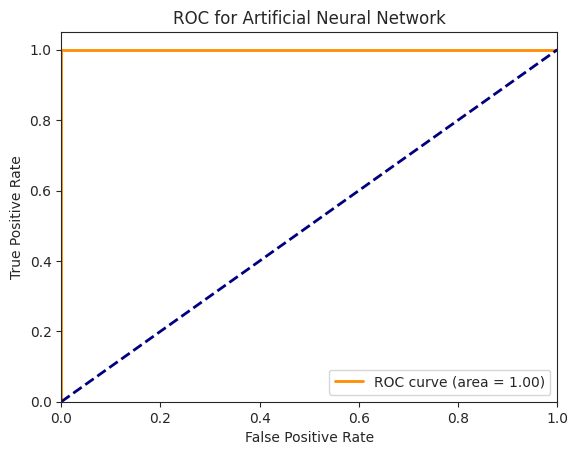

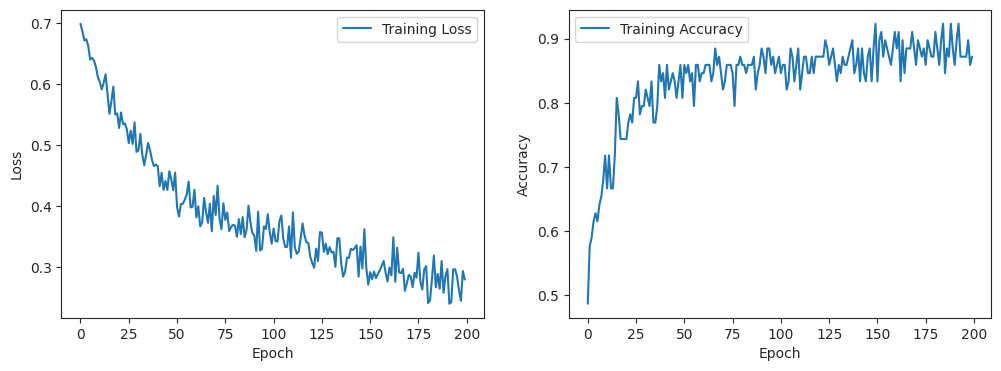

In [120]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

y_pred_probs = ann_model.predict(x_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Artificial Neural Network')
plt.legend(loc='lower right')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Implementation of LDA algorithm to our data:

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)

y_pred = lda.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
method_names.append("LDA")
method_scores.append(lda.score(x_test, y_test))


Accuracy: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix of LDA algorithm

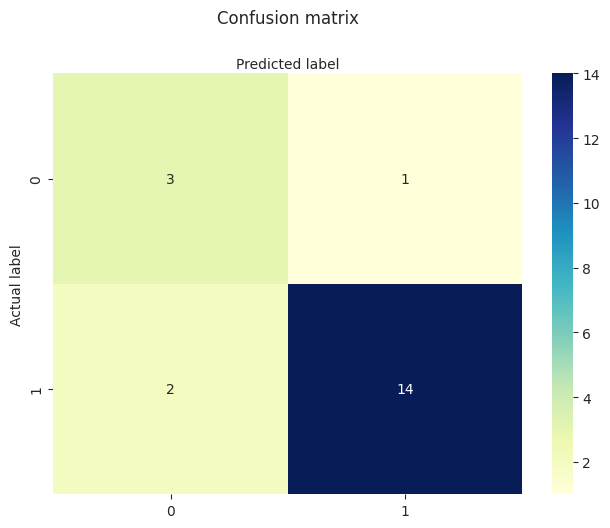

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.93      0.88      0.90        16

    accuracy                           0.85        20
   macro avg       0.77      0.81      0.78        20
weighted avg       0.87      0.85      0.86        20



In [104]:
y_pred = lda.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)

report = classification_report(y_pred,y_test)
print(report)

Implementation of Ensemble Learning (Voting Classifier) algorithm to our data:

In [105]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators = [('rf', rf), ('lr', logreg)], voting = 'hard')
eclf1 = eclf1.fit(x_train, y_train.values.ravel())
print(eclf1.predict(x_test))
eclf2 = VotingClassifier(estimators=[('rf', rf), ('lr', logreg)],voting='soft')
eclf2 = eclf2.fit(x_train, y_train.values.ravel())
print(eclf2.predict(x_test))

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


Confusion matrix of EL algortihm - hard voting:

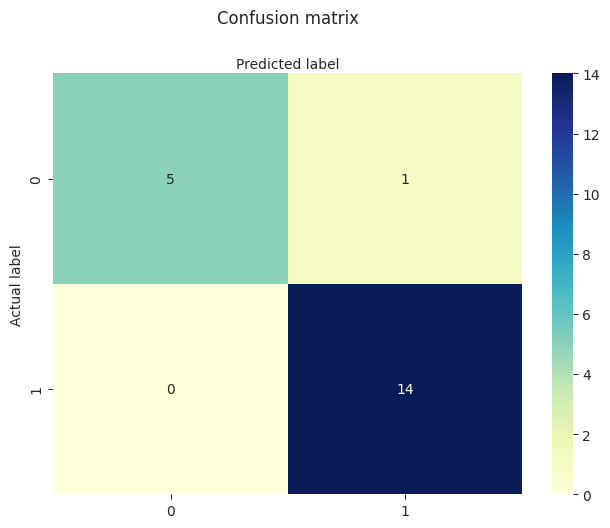

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [106]:
y_pred = eclf1.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)

report = classification_report(y_pred,y_test)
print(report)

Confusion matrix of EL algortihm - soft voting:

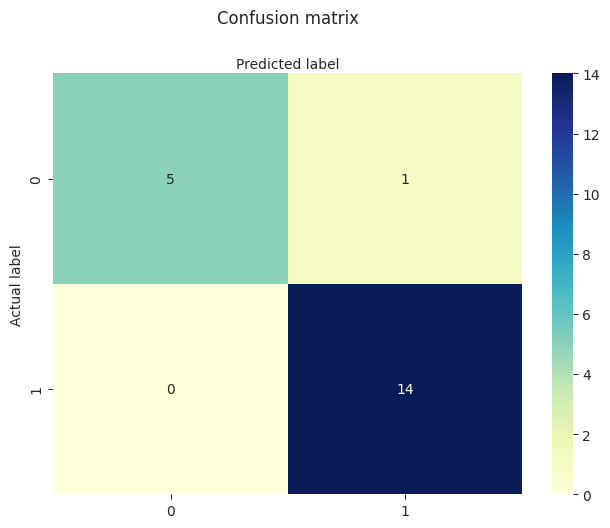

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [107]:
y_pred = eclf2.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
conf_matrix(cnf_matrix,y_test)
report = classification_report(y_pred,y_test)
print(report)

In [108]:
method_names.append("Ensemble")
method_scores.append(0.95)

Plotting all methods and their respective scores in a single graph

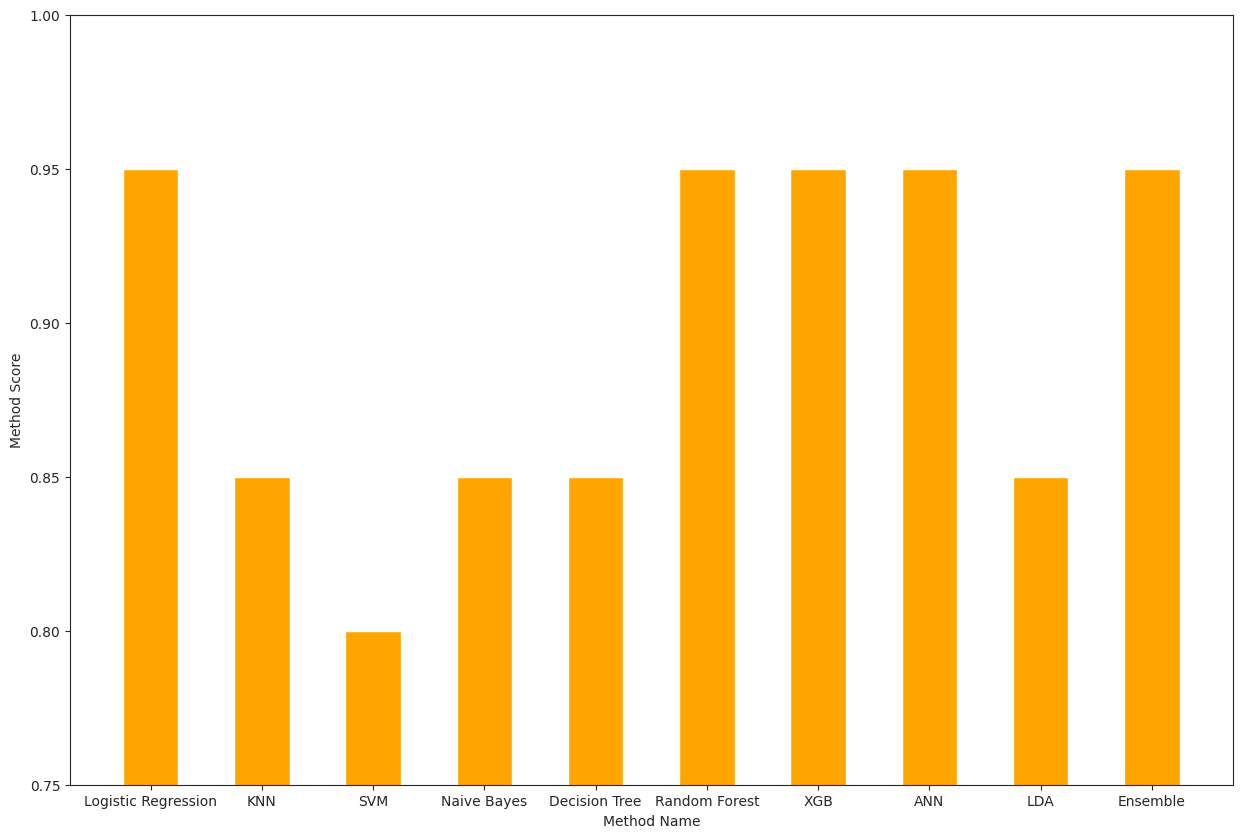

In [117]:
plt.figure(figsize=(15,10))
plt.ylim([0.75, 1])
plt.bar(method_names,method_scores,width=0.5, color='orange')
plt.xlabel('Method Name')
plt.ylabel('Method Score')

plt.show()




Defining a function to compute the ROC analysis of all our algorithms:

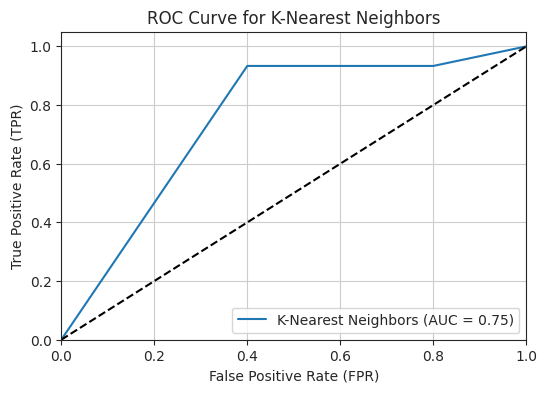

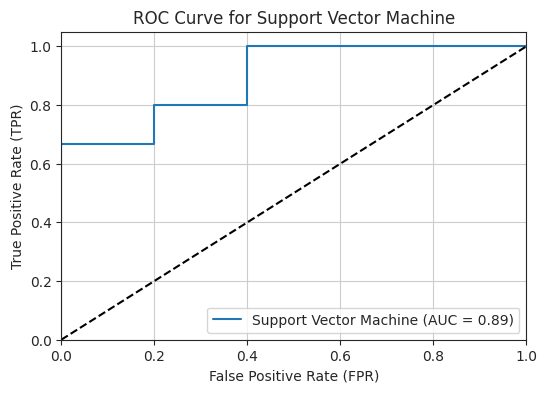

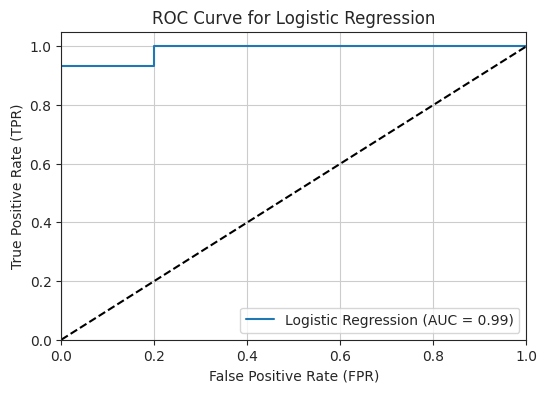

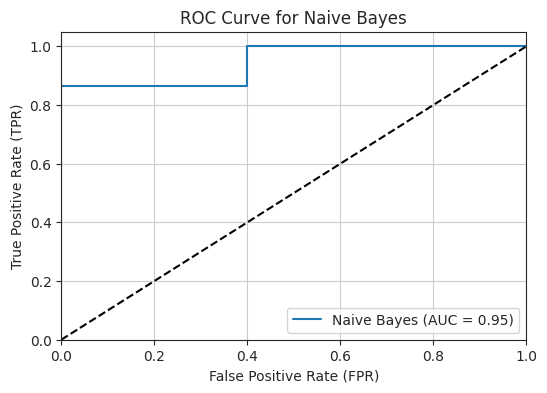

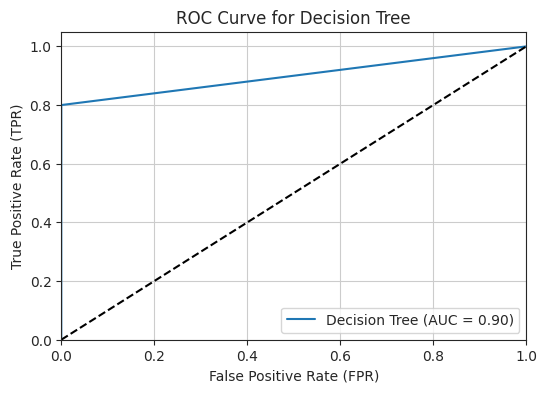

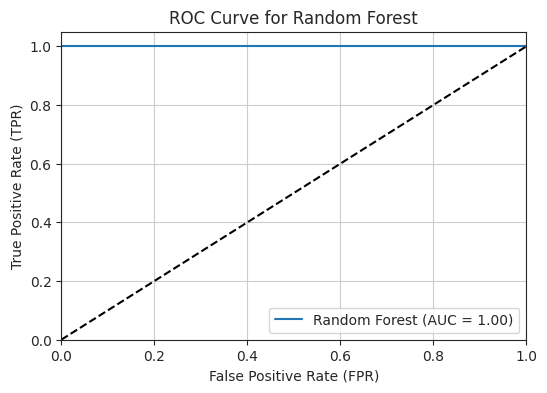

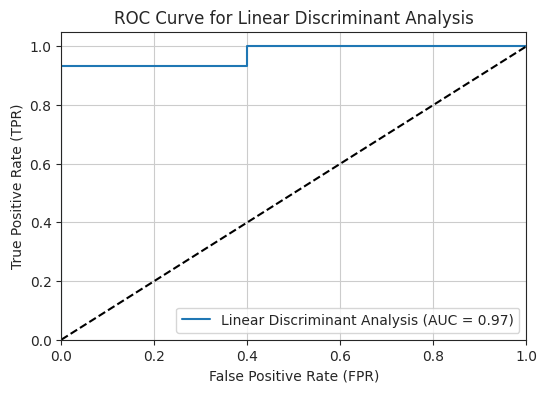

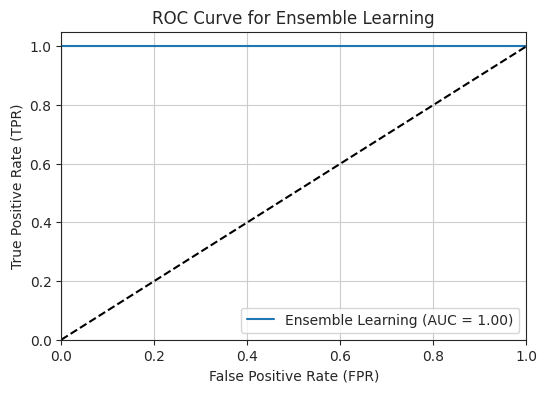

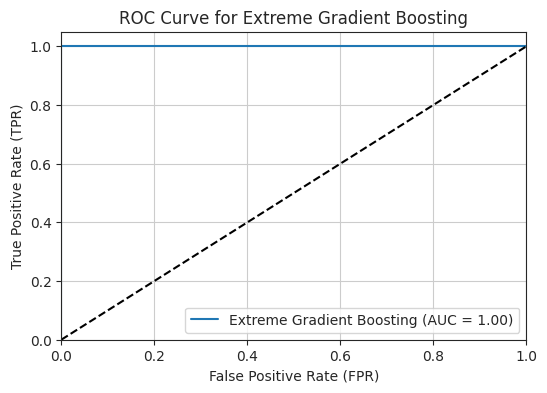

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def perform_roc_analysis(model, model_name, X_test, y_test):

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Performing ROC analysis for each model
perform_roc_analysis(knn, 'K-Nearest Neighbors', x_test, y_test)
perform_roc_analysis(svm, 'Support Vector Machine', x_test, y_test)
perform_roc_analysis(logreg, 'Logistic Regression', x_test, y_test)
perform_roc_analysis(nb, 'Naive Bayes', x_test, y_test)
perform_roc_analysis(dtcla, 'Decision Tree', x_test, y_test)
perform_roc_analysis(rf, 'Random Forest', x_test, y_test)
perform_roc_analysis(lda, 'Linear Discriminant Analysis', x_test, y_test)
perform_roc_analysis(eclf2, 'Ensemble Learning', x_test, y_test)
perform_roc_analysis(xgb, 'Extreme Gradient Boosting', x_test, y_test)
